<a href="https://colab.research.google.com/github/robertoarturomc/Visualizacion/blob/main/10_Mejores_Visualizaciones_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('fivethirtyeight')

# 10. Mejorando Visualizaciones I
## Los seis Principios de Integridad Gráfica de Edward Tufte

Edward Rolf Tufte es un Estadístico y profesor de la Universidad de Yale. Se le considera un pionero en el campo de la visualización de datos. 
Uno de sus libros, *`The Visual Display of Quantitative Information`*, es considerado una "Biblia" en la Visualización de Datos.

Él desarrolló 6 principios de integridad gráfica para generar mejores visualizaciones. Estos principios son ampliamente aceptados en todo el mundo. Además, se relacionan bastante con un principio que ya discutimos en clase, KISS: Keep it Simple...Student.

![TuftePPT](http://www.globalnerdy.com/wordpress/wp-content/uploads/2015/07/every-time-you-make-a-powerpoint.jpg)



La idea más importante es la siguiente:

Maximizar el radio: $$ TintaDatos/Tinta $$

(Data-ink ratio)

Es decir, que la mayor cantidad posible de "tinta" en nuestro gráfico debe estar dedicada a representar la información.

Más información en [este Link](https://www.codeconquest.com/blog/data-ink-ratio-explained-with-example/)

Los principios de Edward Tufte para poder maximizar este radio son los siguientes:

### 1. Las representaciones de números deben coincidir con sus verdaderas proporciones.

¿Qué ves incorrecto en este gráfico?

![RonaldoSales](https://media.licdn.com/dms/image/C4E12AQELo_k88tQuBQ/article-inline_image-shrink_1500_2232/0/1590589234212?e=1684972800&v=beta&t=oWgvNPrACNOiM3Bc4ovaBXTaC_E6pGoFXcEfocC3Syk)



Las barras están desproporcionadas, ¿no? Los tamaños no corresponden con su valor numérico. Esto es evidente cuando hacemos la gráfica en Python:

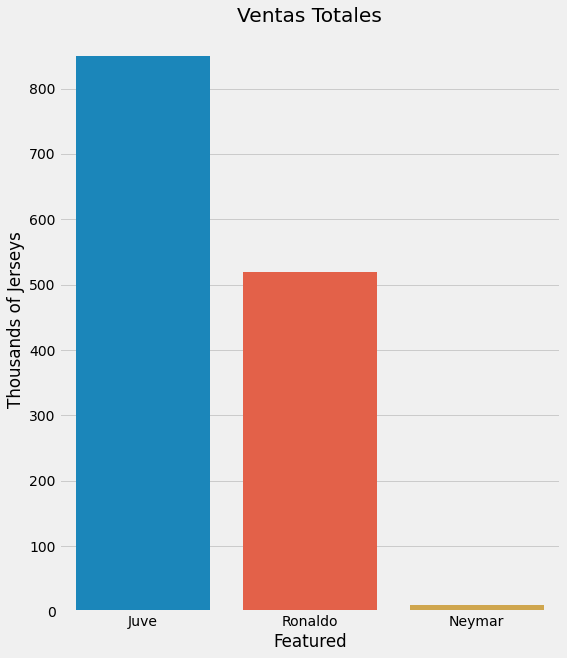

In [ ]:
sales = pd.DataFrame([["Juve", 850],
                      ["Ronaldo", 520],
                      ["Neymar", 10]],
                     columns = ["Featured", "Thousands of Jerseys"])

plt.figure(figsize=[8, 10])
sns.barplot(data=sales, x="Featured", y="Thousands of Jerseys")
plt.title("Ventas Totales")
plt.show()

Por fortuna, al hacerlo con código, nuestros datos quedarán en la escala correcta en automático, ¿no?

Pues...no siempre.

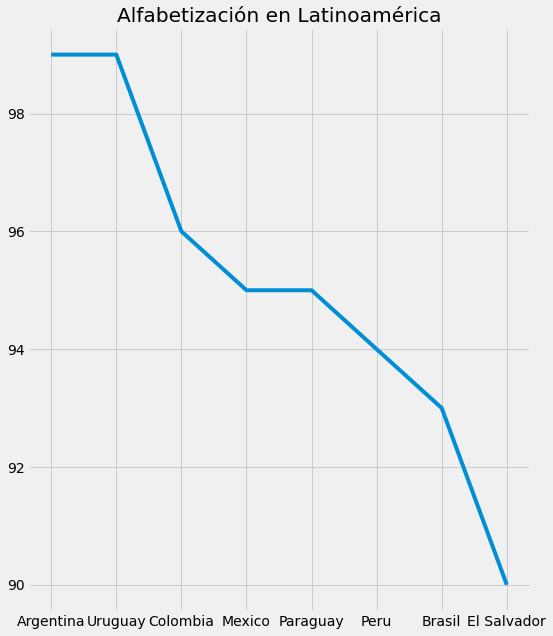

In [ ]:
alfab = pd.DataFrame([["Argentina", 99],
                      ["Uruguay", 99],
                      ["Colombia", 96],
                      ["Mexico", 95],
                      ["Paraguay", 95],
                      ["Peru", 94],
                      ["Brasil", 93],
                      ["El Salvador", 90]],
                     columns = ["pais", "percent"])

plt.figure(figsize=[8, 10])
plt.plot(alfab["pais"], alfab["percent"])
plt.title("Alfabetización en Latinoamérica")
plt.show()

El problema es que, a veces, hacerlo en la escala correcta hace que no se aprecien correctamente las diferencias.

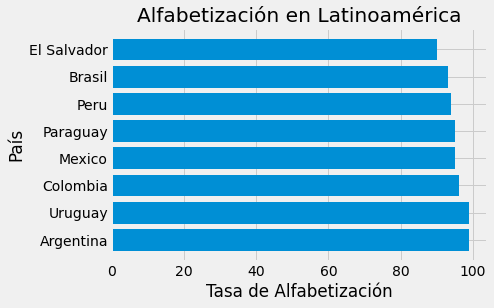

In [ ]:
plt.barh(alfab["pais"], alfab["percent"])
plt.title("Alfabetización en Latinoamérica")
plt.xlabel("Tasa de Alfabetización")
plt.ylabel("País")
plt.show()

Para esos casos, siempre será útil buscar métricas alternativas: puede ser la inversa (1-0.99), o tasas de cambio.

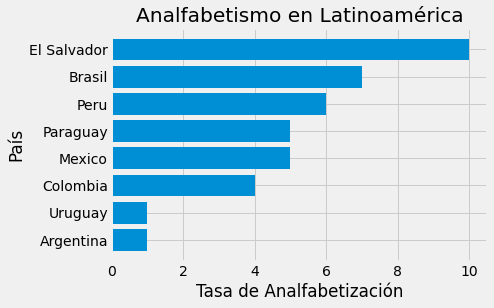

In [ ]:
plt.barh(alfab["pais"], 100-alfab["percent"])
plt.title("Analfabetismo en Latinoamérica")
plt.xlabel("Tasa de Analfabetización")
plt.ylabel("País")
plt.show()

### 2. El etiquetado debe ser claro y detallado.

Pocas palabras, pero que expliquen lo más posible.

Todas las explicciones **pertinentes** deben estar dentro de la visualización.

Por ejemplo, enlista todo lo que veas mal en la siguiente visualización:

![Mal etiquetado](https://media.licdn.com/dms/image/C5612AQFMKEebRCtalw/article-inline_image-shrink_1500_2232/0/1590593925537?e=1684972800&v=beta&t=U3AvIvVt7bvht_uVCoiwUXQZi88l6AQTNcUXS-BbjHM)

1. Sin título que diga qué estamos viendo.
2. Sin idea de la Unidad (idealmente, mostrarse en eje y)
3. Las etiquetas del eje X están fuera de orden e inconsistentes.

In [ ]:
plt.sub?

Object `plt.sub` not found.



### 3. Mostrar variaciones en los datos, no de Diseño.

Todo lo referente al diseño elegido debe ser **lo más consistente posible**. Eso incluye las escalas, los ejes, las Unidades, colores, etc.

Un (mal) ejemplo es el siguiente:

![BadVar](https://media.licdn.com/dms/image/C5612AQGmxr7iWpI39w/article-inline_image-shrink_1000_1488/0/1590598475460?e=1684972800&v=beta&t=WAV67S3Px3YQuEvo8NC_JoCfP9YonC_Tb89Sy0fIrn0)


El gráfico es inconsistente. Nos muestra información anual, y luego trimestral. Esto puede ser bastante confuso.


### 4. Usar las Unidades más fáciles de entender

De entrada, ¡no se olviden de mostrar con qué Unidades están trabajando!

En segundo lugar, escojan unidades fáciles de entender para su audiencia.




### 5. El número de dimensiones representadas debe ser el mismo que el número de dimensiones en los datos.

Si algo puede ser representado en dos dimensiones, no es necesario agregar una tercera.

### 6. Las representaciones no deben implicar un contexto no deseado.

¡El contexto importa!

En medida de lo posible, usar comparaciones, para facilitar que la gente pueda entender lo mostrado.

Por ejemplo, el primer gráfico hacía una muy buena comparación, entre las ventas totales de la Juve, y de otro jugador relevante (Neymar), para aportar contexto a las ventas de jerseys de Cristiano Ronaldo.

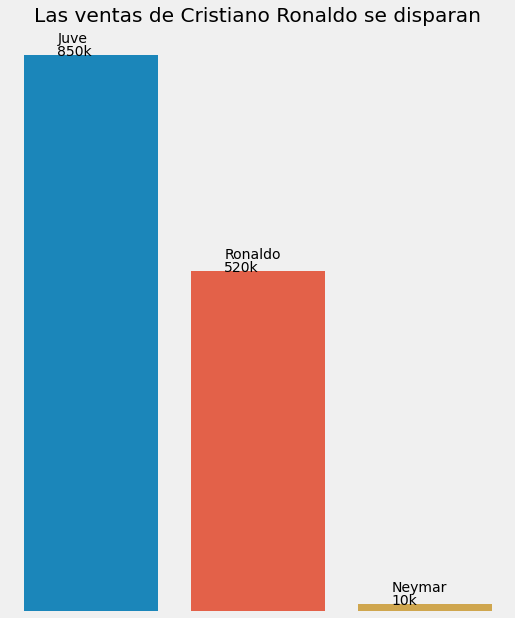

In [ ]:
sales = pd.DataFrame([["Juve", 850],
                      ["Ronaldo", 520],
                      ["Neymar", 10]],
                     columns = ["Featured", "Thousands of Jerseys"])

plt.figure(figsize=[8, 10])
sns.barplot(data=sales, x="Featured", y="Thousands of Jerseys")
plt.title("Las ventas de Cristiano Ronaldo se disparan")

for i in range(len(sales)):
    plt.text(i-0.2, sales.iloc[i, 1] + 20, str(sales.iloc[i, 0]) )
    plt.text(i-0.2, sales.iloc[i, 1], str(sales.iloc[i, 1]) + "k" )

plt.axis('off')
  
plt.show()

In [ ]:
,